To get started with harmonics, we will start by visualising some waveforms. 

**Harmonics**
Some (or many) waveforms are made up of multiple sine wave. The frequency of these waves are known as harmonics.We will also understand the concept of aliasing and develop our own code to produce the spectrum of a signal.

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Audio

# Triangular Waves

In [125]:
samplingPoints = 10000 # also known as sampling rate
t = np.linspace(0,1,samplingPoints)
#duration of each cycle is period.
p=0.005 
freq=1/p
a=1
print("Frequency  = {}".format(freq))
f2 = ((4*a)/p)*np.abs(((t-(p/1))%p)-(p/2))-a 

# altering the (-p/4) term will change the phase
# altering the a will change the amplitude of the signal

Frequency  = 200.0


Observe that the number of sampling points impacts the quality of the signal. In particular, we should observe one traingle wave between $0$ to $0.005$, or say three triangular wave between 0 to $3*0.005$. But we dont necessary see that for a very low number of sampling points. Why do you think so ? and how many sampling points do we need to represent the wave properly.

Text(0, 0.5, 'Amplitude')

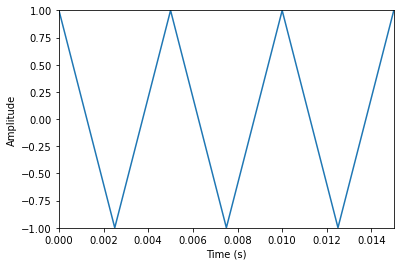

In [126]:
plt.plot(t,f2)
plt.xlim([0.,0.015])
plt.ylim(-1,1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Spectrum of Triangular Waves

In [132]:
def fft(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    A = np.abs(A)
    return F[0:sr//2], A[0:sr//2]

Fundamental Freuquency is 200.0


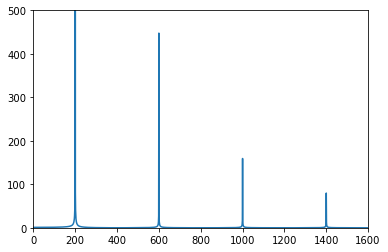

In [130]:
F,A = fft(f2,samplingPoints)
plt.plot(F[1:],A[1:])
plt.ylim((0,500))
plt.xlim((0,1600))
print("Fundamental Freuquency is {}".format(F[np.argmax(A[1:])+1]))

Some Interesting observations about triangular wave;
- All harmonics appear at the odd multiples of the fundamental frequency.
- Ampltude drops off in realtion to frequency squared.

In [70]:
print("Frequency Ratio = {:.2f}".format(600/200))
print("Amplitude Ratio = {:.2f}".format(A[200]/A[600]))
print(3**2)

Frequency Ratio = 3.00
Amplitude Ratio = 9.04
9


In [72]:
print("Frequency Ratio = {:.2f}".format(1000/600))
print("Amplitude Ratio = {:.2f}".format(A[600]/A[1000]))
print(1.67**2)

Frequency Ratio = 1.67
Amplitude Ratio = 2.81
2.7889


# Square Wave

In [10]:
def sgn(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

In [11]:
samplingPoints = 10000 # also known as sampling rate
t = np.linspace(0,1,samplingPoints)
freq=100
a=1
print("Frequency  = {}".format(freq))
_f = a*np.sin(2*np.pi*freq*t)
f = np.array([i for i in map(sgn, _f)])


Frequency  = 100


(0.0, 0.03)

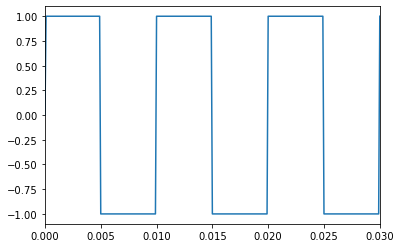

In [12]:
plt.plot(t,f)
plt.xlim((0,0.030))

What changes will you fo to your function if you want the square wave to fluctuate between -0.5 and 0.5?

Fundamental Freuquency is 100.0


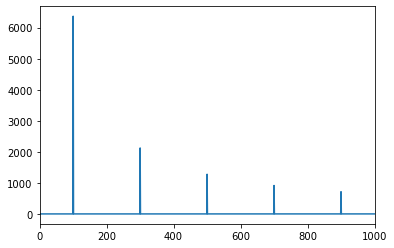

In [13]:
F,A = fft(f,samplingPoints)
plt.plot(F[1:],A[1:])
#plt.ylim((0,500))
plt.xlim((0,1000))
print("Fundamental Freuquency is {}".format(F[np.argmax(A[1:])+1]))

Some interesting observations about square wave,
- Like a triangle wave, the square wave contains only odd harmonics, which is why there are peaks at 300, 500, and 700 Hz.
- Amplitude drops off in relation to frequency (not frequency squared)

# Aliasing

Let us try to understand aliasing with an example. 

**Example 1**: Traingle wave with a frequency of 1100  Hz,  sampled  at 10,000 frames per second

Frequency  = 1100
Fundamental Freuquency is 1100.0


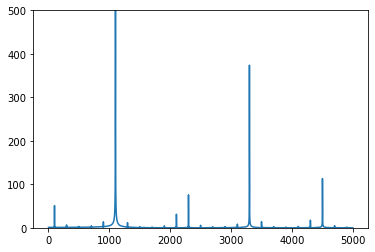

In [48]:
samplingPoints = 10000 # also known as sampling rate
t = np.linspace(0,1,samplingPoints)
#duration of each cycle is period.
freq = 1100  
p = 1/freq
a = 1
print("Frequency  = {}".format(freq))
f2 = ((4*a)/p)*np.abs(((t-(p/1))%p)-(p/2))-a 

# plot the spectrum
F,A = fft(f2,samplingPoints)
plt.plot(F[1:],A[1:])
plt.ylim((0,500))
#plt.xlim((0,10000))
print("Fundamental Freuquency is {}".format(F[np.argmax(A[1:])+1]))


The harmonics of this wave should be at 3300, 5500, 7700, and 9900 Hz.  In the figure,  there are peaks at 1100 and 3300 Hz,  as expected,  but the thirdpeak is at 4500, not 5500 Hz.  The fourth peak is at 2300, not 7700 Hz. What is going on? To understand this better, lets take a simple example below

**Example 2**: 
- Cosine signal at 4500 Hz with a sampling rate of 10,000 points per seconds
- Cosine signal at 5500 Hz with a sampling rate of 10,000 points per seconds

(0.0, 0.0022222222222222222)

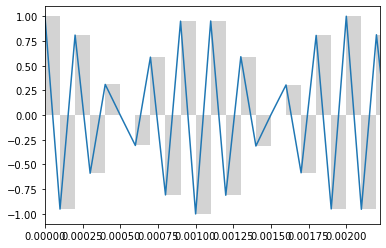

In [122]:
samplingPoints = 10000;
freq = 4500
t = np.linspace(0,1,samplingPoints)
f = np.cos(2*np.pi*freq*t)
plt.plot(t,f)
plt.bar(t,f,align='edge', width=0.0001, color='lightgrey')
plt.xlim((0,(1/4500)*10))

(0.0, 0.0022222222222222222)

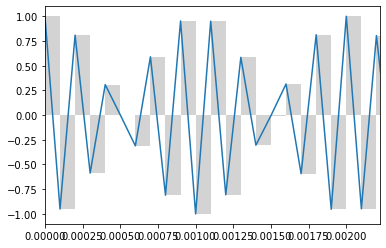

In [123]:
samplingPoints = 10000;
freq = 5500
t = np.linspace(0,1,samplingPoints)
f = np.cos(2*np.pi*freq*t)
plt.plot(t,f)
plt.bar(t,f,align='edge', width=0.0001, color='lightgrey')
plt.xlim((0,(1/4500)*10))

The problem is, even tough the signals are different, the waves are identical. When we sample a 5500 Hz signal at 10,000 frames per second, the result isindistinguishable from a 4500 Hz signal. This effect is called **aliasing** because when the high frequency signal is sampled, it appears to be a low frequency signal.

In this example, the highest frequency we can measure is 5000 Hz, which is halfthe sampling rate.  Frequencies above 5000 Hz are folded back below 5000 Hz. which is why this threshold is sometimes called the “folding frequency”.  It issometimes also called the **Nyquist frequency**.

**Example 3**: Traingle wave with a frequency of 1  Hz,  sampled  at 2 points second

The interactove plot below shows how a 1 Hz Sine wave differs practically from its theoretical viewpoint when sampling rate changes.

In [124]:

@widgets.interact(samplingPoints=(0,100))
def f(samplingPoints=1):
    fig, ax = plt.subplots(2,1)
    freq = 1
    t = np.linspace(0,1,samplingPoints)
    f = np.sin(2*np.pi*freq*t)
    ax[0].plot(t,f)
    F,A = fft(f,samplingPoints)
    ax[1].plot(F[:],A[:])
    print(samplingPoints)

interactive(children=(IntSlider(value=1, description='samplingPoints'), Output()), _dom_classes=('widget-inter…

Now, increase the ```samplingPoints``` above and observe how the reault changes. We observe that higher smapling points gives us much better results. Lower sampling points gives us erronous signals

# Spectrum

In [ ]:
def fft(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    A = np.abs(A)
    return F[0:sr//2], A[0:sr//2]

`np.fft` is  the  NumPy  module  that  provides  functions  related  to  the **Fast Fourier  Transform (FFT)**,  which  is  an  efficient  algorithm  that  computes the **Discrete Fourier Transform (DFT)**. We will learn abot the DFT in later chapters. For now, we will just use it as a given fact.

Every wave or signal that we have considered till now contained only real values. None of them contained complex numbers.  Later  we’ll  see  the  full  FFT algorithm,  which  can handle complex signals as well. The result of `np.rfft` is an array of complex numbers that  represents  the  **amplitude**  and  **phase  offset**  of  eachfrequency component in the wave.

The result of `np.rfftfreq`, is an array that contains **frequencies** corresponding to the **amplitudes**

**Complex Number**
- A complex number is the sum of a real part and an imaginary part, often written $x+iy$, where $i$ is the imaginary unit, $\sqrt(-1)$.  You can think of $x$ and $y$ as Cartesian coordinates.
- A complex number is also the product of a magnitude and a complex exponential, $A\exp^{i\phi}$,  where $A$ is  the magnitude and $\phi$ is  the angle in radians, also called the “argument”.  You can think of $A$ and $\phi$ as polar coordinates.

Each  value  of the **amplitude** corresponds  to  a  frequency  component:   its  magnitude  is proportional  to  the  amplitude  of  the  corresponding  component;  its  angle  is the phase offset